In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.linear_model as lm
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('powerproduction.csv')

In [3]:
df.shape

(500, 2)

In [4]:
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [5]:
df.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [6]:
df.tail()

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


In [7]:
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


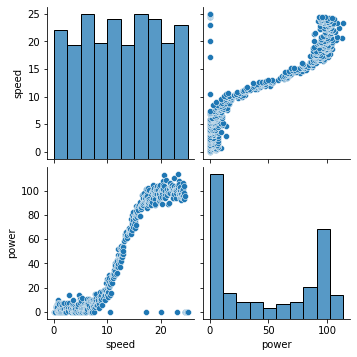

In [8]:
sns.pairplot(df)

## Clean DataSet

To clean the dataset we first need to identify irregular data.

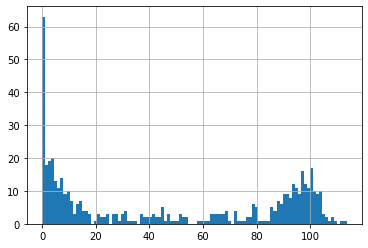

In [9]:
# https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d
df['power'].hist(bins=100)
plt.show()

The dataset contains a number of entries where the power output is equal to 0. This occurs at various intervals right throughout the dataset, as seen below. This indicates that the power output may not have been recorded at these speeds. The first step will be to remove these erroneous entries.

In [10]:
df.loc[df['power'] == 0]

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
15,0.726,0.0
16,0.751,0.0
24,1.026,0.0
26,1.076,0.0
31,1.301,0.0


In [11]:
df = df.loc[df['power'] != 0]
df

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [12]:
df.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


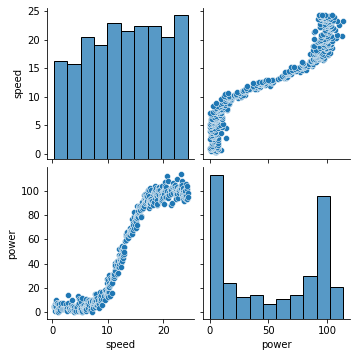

In [13]:
sns.pairplot(df)

## Training

In [14]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X = df['speed'].values
y = df['power'].values

X = X.reshape(-1,1)

# Split dataset into training set and test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)

## Regression


In [15]:
# https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/regression.ipynb
m = lm.LinearRegression()

In [31]:
m.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = m.predict(X_test)

Coefficients: 
 [5.77731013]
Mean squared error: 190.57
Coefficient of determination: 0.88


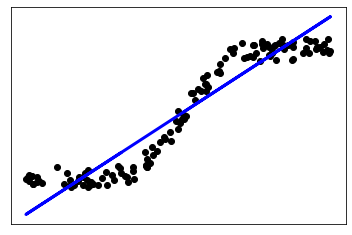

In [33]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# The coefficients
print('Coefficients: \n', m.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [45]:
Xnew = [[8]]

In [46]:
m.predict(Xnew)

array([24.47754017])

In [38]:
ynew

array([-8.87487121])